In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

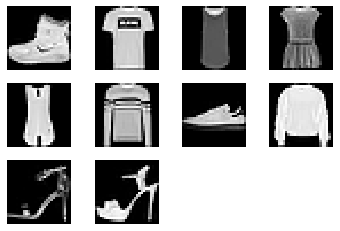

In [3]:
plt.figure()
for k in range(10):
    plt.subplot(3,4,k+1)
    plt.imshow(X_train_full[k], cmap="gray")
    plt.axis('off')
plt.show()

In [4]:
X_valid = X_train_full[:5000] / 255.0
X_train = X_train_full[5000:] / 255.0
X_test = X_test / 255.0

y_valid = y_train_full[:5000]
y_train = y_train_full[5000:]

In [5]:
from functools import partial

my_dense_layer = partial(tf.keras.layers.Dense, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.0001))

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    
    my_dense_layer(128),
    #my_dense_layer(64),
    my_dense_layer(32),
    #my_dense_layer(128),
   
    #my_dense_layer(400),
   # my_dense_layer(100),
   # my_dense_layer(100),

    
    #my_dense_layer(600),
    #my_dense_layer(400),
    #my_dense_layer(200),
    my_dense_layer(10, activation="softmax")
])

In [6]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
             metrics=["accuracy"])

validation below training -> not overfitting. validation go down whole time, train further. 

In [7]:
history = model.fit(X_train, y_train, epochs=40, validation_data=(X_valid,y_valid))


Train on 55000 samples, validate on 5000 samples
Epoch 1/40
55000/55000 [==============================] - 4s 64us/sample - loss: 1.5852 - accuracy: 0.5262 - val_loss: 1.0811 - val_accuracy: 0.6854
Epoch 2/40
55000/55000 [==============================] - 3s 53us/sample - loss: 0.9273 - accuracy: 0.7161 - val_loss: 0.8066 - val_accuracy: 0.7542
Epoch 3/40
55000/55000 [==============================] - 3s 58us/sample - loss: 0.7622 - accuracy: 0.7628 - val_loss: 0.7076 - val_accuracy: 0.7862
Epoch 4/40
55000/55000 [==============================] - 3s 53us/sample - loss: 0.6848 - accuracy: 0.7910 - val_loss: 0.6518 - val_accuracy: 0.8030
Epoch 5/40
55000/55000 [==============================] - 3s 52us/sample - loss: 0.6363 - accuracy: 0.8058 - val_loss: 0.6128 - val_accuracy: 0.8148
Epoch 6/40
55000/55000 [==============================] - 3s 50us/sample - loss: 0.6022 - accuracy: 0.8157 - val_loss: 0.5826 - val_accuracy: 0.8240
Epoch 7/40
55000/55000 [==============================] -

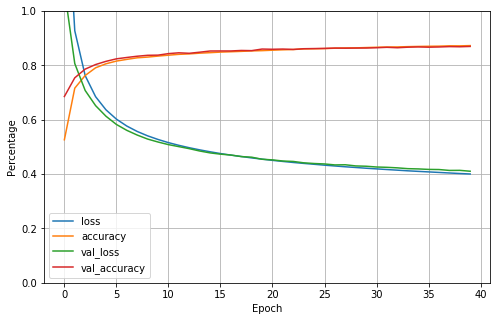

In [8]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.ylabel("Percentage")
plt.xlabel("Epoch")
plt.show()

In [9]:
model.evaluate(X_test,y_test)

10000/10000 [==============================] - 0s 27us/sample - loss: 0.4424 - accuracy: 0.8552


[0.44243037481307984, 0.8552]

In [10]:
y_pred = model.predict_classes(X_train)
conf_train = confusion_matrix(y_train, y_pred)
print(conf_train)

[[4663   27   76  215   14    7  492    0   49    0]
 [  14 5270   25  111    8    1   13    0    2    0]
 [  56   13 4400   47  582    0  372    0   26    0]
 [ 172   62   53 4863  208    0  122    0   18    1]
 [  11    4  514  150 4414    0  399    0   19    1]
 [   4    0    0    3    0 5207    1  197   18   77]
 [ 743   15  560  142  415    0 3574    1   57    0]
 [   0    0    0    0    0  149    0 5146    9  184]
 [  28    3   30   30   20   16   69   21 5292    1]
 [   2    1    1    1    0   54    1  192    2 5240]]


In [11]:
y_pred = model.predict_classes(X_test)
conf_test = confusion_matrix(y_test, y_pred)
print(conf_test)

[[811   3  12  46   5   1 109   0  13   0]
 [  4 957   6  24   5   0   3   0   1   0]
 [ 17   3 774  10 124   1  68   0   3   0]
 [ 30  13  12 867  35   1  39   0   3   0]
 [  0   1 118  35 767   0  72   0   7   0]
 [  0   0   0   1   0 932   0  45   2  20]
 [139   2 117  38  85   0 603   0  16   0]
 [  0   0   0   0   0  27   0 936   0  37]
 [  4   1   6   7   3   3  15   6 955   0]
 [  0   0   0   0   0   7   1  42   0 950]]


CNN

In [12]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
X_valid = X_train_full[:5000] / 255.0
X_train = X_train_full[5000:] / 255.0
X_test = X_test / 255.0

y_valid = y_train_full[:5000]
y_train = y_train_full[5000:]

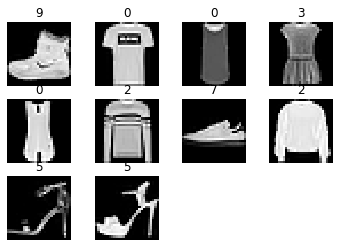

In [29]:
plt.figure()
for k in range(10):
    plt.subplot(3,4,k+1)
    plt.imshow(X_train_full[k], cmap="gray")
    plt.axis('off')
    plt.title(y_train_full[k])
plt.show()

In [13]:
X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [14]:
my_dense_layer = partial(tf.keras.layers.Dense, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.0001))
my_conv_layer = partial(tf.keras.layers.Conv2D, activation="relu", padding="valid")

model = tf.keras.models.Sequential([
    my_conv_layer(6,5,padding="same",input_shape=[28,28,1]),
    tf.keras.layers.AveragePooling2D(2),
   # my_conv_layer(8,5),
    #tf.keras.layers.AveragePooling2D(2),
    my_conv_layer(32,3),
    my_conv_layer(64,3),
    my_conv_layer(128,3),
    my_conv_layer(256,3),
    my_conv_layer(512,3),
    tf.keras.layers.Flatten(),
    my_dense_layer(256),
    #my_dense_layer(32),
    #my_dense_layer(8),
    my_dense_layer(10, activation="softmax")
])

In [15]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
             metrics=["accuracy"])

In [16]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid,y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 220s 4ms/sample - loss: 0.6851 - accuracy: 0.7577 - val_loss: 0.4855 - val_accuracy: 0.8288
Epoch 2/10
55000/55000 [==============================] - 219s 4ms/sample - loss: 0.4555 - accuracy: 0.8415 - val_loss: 0.3987 - val_accuracy: 0.8640
Epoch 3/10
55000/55000 [==============================] - 215s 4ms/sample - loss: 0.3921 - accuracy: 0.8656 - val_loss: 0.3671 - val_accuracy: 0.8796
Epoch 4/10
55000/55000 [==============================] - 219s 4ms/sample - loss: 0.3525 - accuracy: 0.8791 - val_loss: 0.3421 - val_accuracy: 0.8806
Epoch 5/10
55000/55000 [==============================] - 218s 4ms/sample - loss: 0.3230 - accuracy: 0.8891 - val_loss: 0.3436 - val_accuracy: 0.8788
Epoch 6/10
55000/55000 [==============================] - 219s 4ms/sample - loss: 0.3015 - accuracy: 0.8984 - val_loss: 0.2970 - val_accuracy: 0.8998
Epoch 7/10
55000/55000 [===========================

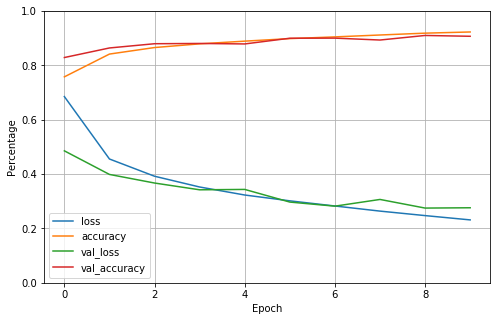

In [17]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.ylabel("Percentage")
plt.xlabel("Epoch")
plt.show()

In [18]:
y_pred = model.predict_classes(X_train)
conf_train = confusion_matrix(y_train, y_pred)
print(conf_train)

[[5027    0   42   58   12    2  391    0   11    0]
 [   3 5343    6   75    4    0   11    0    2    0]
 [  54    0 4789   22  378    0  243    0   10    0]
 [ 123    0   29 5017  201    0  128    0    1    0]
 [  12    2  166   98 5024    0  206    0    4    0]
 [   0    0    0    0    0 5433    0   56    0   18]
 [ 475    1  253   58  294    1 4412    0   13    0]
 [   0    0    0    0    0   39    0 5314    0  135]
 [   9    0   11    3   14   11   12    0 5450    0]
 [   0    0    0    0    0    8    0  105    1 5380]]


In [19]:
model.evaluate(X_test,y_test)

10000/10000 [==============================] - 6s 583us/sample - loss: 0.3052 - accuracy: 0.8991


[0.3051826845049858, 0.8991]

In [20]:
y_pred = model.predict_classes(X_test)
conf_test = confusion_matrix(y_test, y_pred)
print(conf_test)

[[848   0  12  15   4   1 111   0   9   0]
 [  0 969   2  22   1   0   5   0   1   0]
 [ 14   0 820   7  88   0  68   0   3   0]
 [ 26   2  12 878  42   0  36   0   4   0]
 [  1   0  48  21 876   0  54   0   0   0]
 [  0   0   0   0   0 977   0  12   0  11]
 [129   0  55  19  83   0 706   0   8   0]
 [  0   0   0   0   0  11   0 965   0  24]
 [  0   0   4   2   4   7   2   2 978   1]
 [  1   0   0   0   0   3   0  22   0 974]]
